In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# upload datasets into dataframe
ed_stats_country=pd.read_csv('EdStatsCountry.csv')
ed_stats_country_series=pd.read_csv('EdStatsCountry-Series.csv')
ed_stats_data=pd.read_csv('EdStatsData.csv')
ed_stats_footNote=pd.read_csv('EdStatsFootNote.csv')
ed_stats_series=pd.read_csv('EdStatsSeries.csv')

# 1- Exploratory analysis of dataframes

In [3]:
# method to establish a dataframe survey
def dataframe_survey(dataframes):
    data_survey=pd.DataFrame(columns=['dataframe','(rows, column)','Total number of nans','percentage of nans','number of duplicated rows','percentage of duplicated rows'])
    for df_name, df_var in dataframes.items():
        shape=str(df_var.shape)
        nans=df_var.isna().sum().sum()
        per_nans='{} %'.format(  round(  ((df_var.isna().sum().sum()/df_var.size).astype(float))*100 ,2) )
        dup_rows=df_var.duplicated().sum()
        per_dup_rows='{} %'.format((df_var.duplicated().sum())/(df_var.shape[0]))
        new_row={'dataframe':df_name,
                 '(rows, column)':shape,
                 'Total number of nans': nans,
                 'percentage of nans': per_nans,
                 'number of duplicated rows':dup_rows,
                 'percentage of duplicated rows':per_dup_rows}
        data_survey=data_survey.append(new_row, ignore_index=True)
    return data_survey

In [4]:
dataframes={'ed_stats_country':ed_stats_country,
            'ed_stats_country_series': ed_stats_country_series,
            'ed_stats_data': ed_stats_data,
            'ed_stats_footNote': ed_stats_footNote,
            'ed_stats_series': ed_stats_series,}
#dataframe_survey(dataframes)

In [5]:
# method to make a survey of dataframe columns
def variable_survey (dataframe):
    df=pd.DataFrame(columns = ['variable name', 'variable type', 'nbr of distinct values','percentage of NaNs'])
    for column in (dataframe.columns):
        var_type = dataframe[column].dtypes
        distinct_values = dataframe[column].nunique()
        percentage_nans = '{} %'.format(round((dataframe[column].isna().sum()/len(dataframe))*100,2))
        new_row={'variable name':column,
                 'variable type':var_type,
                 'nbr of distinct values':distinct_values,
                 'percentage of NaNs':percentage_nans}
        df=df.append(new_row, ignore_index=True)
    return df
        

In [6]:
variable_survey(ed_stats_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Name,object,242,0.0 %
1,Country Code,object,242,0.0 %
2,Indicator Name,object,3665,0.0 %
3,Indicator Code,object,3665,0.0 %
4,1970,float64,24595,91.85 %
...,...,...,...,...
65,2085,float64,7335,94.2 %
66,2090,float64,7150,94.2 %
67,2095,float64,7044,94.2 %
68,2100,float64,6914,94.2 %


In [7]:
# statistical data overview 
ed_stats_series.describe(include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,LO.PISA.SCI.4,Learning Outcomes,PASEC: Distribution of 6th grade mathematics s...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
variable_survey(ed_stats_country)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Code,object,241,0.0 %
1,Short Name,object,241,0.0 %
2,Table Name,object,241,0.0 %
3,Long Name,object,241,0.0 %
4,2-alpha code,object,238,1.24 %
5,Currency Unit,object,152,10.79 %
6,Special Notes,object,131,39.83 %
7,Region,object,7,11.2 %
8,Income Group,object,5,11.2 %
9,WB-2 code,object,240,0.41 %


In [9]:
#variable_survey(ed_stats_data)

In [10]:
#drop unnamed variable from dataframes
ed_stats_data= ed_stats_data.drop(columns=['Unnamed: 69'])
ed_stats_country= ed_stats_country.drop(columns=['Unnamed: 31'])
ed_stats_country_series= ed_stats_country_series.drop(columns=['Unnamed: 3'])
ed_stats_footNote= ed_stats_footNote.drop(columns=['Unnamed: 4'])
ed_stats_series= ed_stats_series.drop(columns=['Unnamed: 20'])

In [11]:
#merge ed_stats_country and ed_stats_data by 'region'
ed_stats_data=ed_stats_data.merge(ed_stats_country[['Country Code','Region']],on='Country Code',how='inner')
variable_survey(ed_stats_data)


,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Name,object,241,0.0 %
1,Country Code,object,241,0.0 %
2,Indicator Name,object,3665,0.0 %
3,Indicator Code,object,3665,0.0 %
4,1970,float64,24592,91.82 %
...,...,...,...,...
65,2085,float64,7335,94.18 %
66,2090,float64,7150,94.18 %
67,2095,float64,7044,94.18 %
68,2100,float64,6914,94.18 %


In [12]:
#define a novel dataframe to stock nans percentage of variables
def nans_df (dataframe):
    df=pd.DataFrame(columns = ['variable name', 'percentage of NaNs'])
    for column in (dataframe.columns):
        percentage_nans = round((dataframe[column].isna().sum()/len(dataframe))*100,2)
        new_row={'variable name':column,
                 'percentage of NaNs':percentage_nans}
        df=df.append(new_row, ignore_index=True)
    df.sort_values(by='percentage of NaNs',inplace=True)
    df.plot(kind='bar',x='variable name', stacked=False,rot=45,figsize=(20,6))
    return df

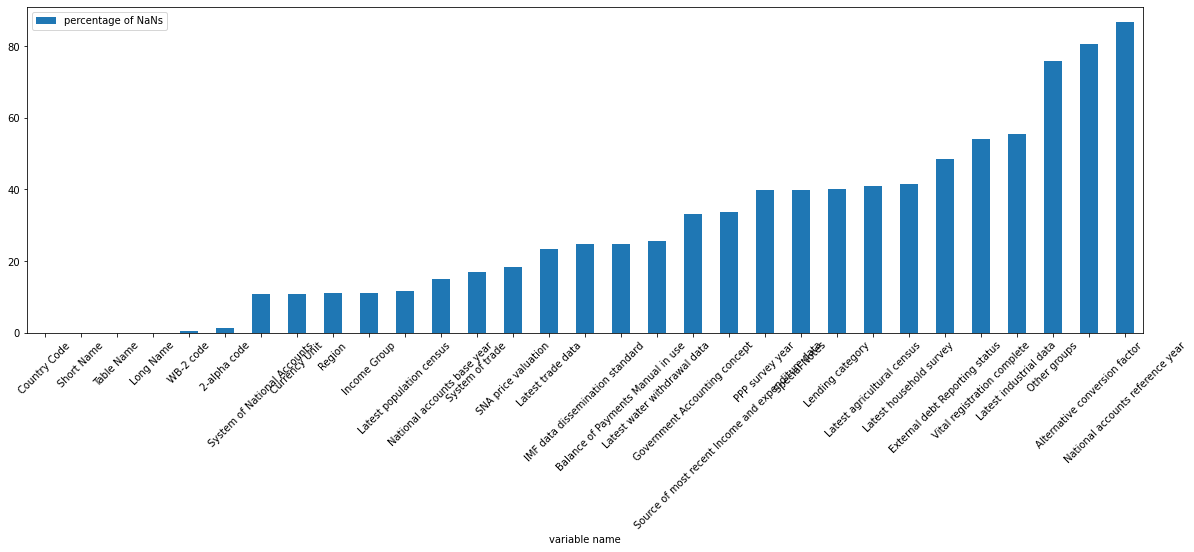

In [13]:
df_for_barplot=nans_df(ed_stats_country)


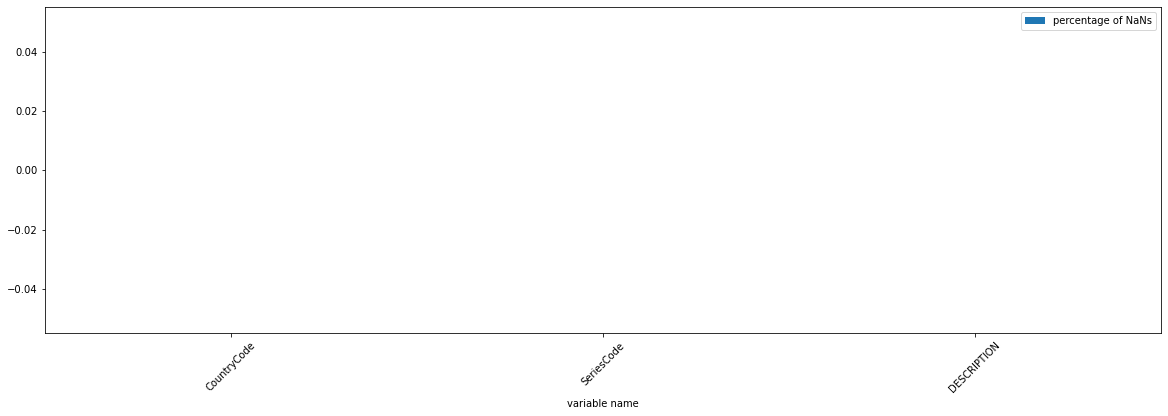

In [14]:
df_for_barplot=nans_df(ed_stats_country_series)

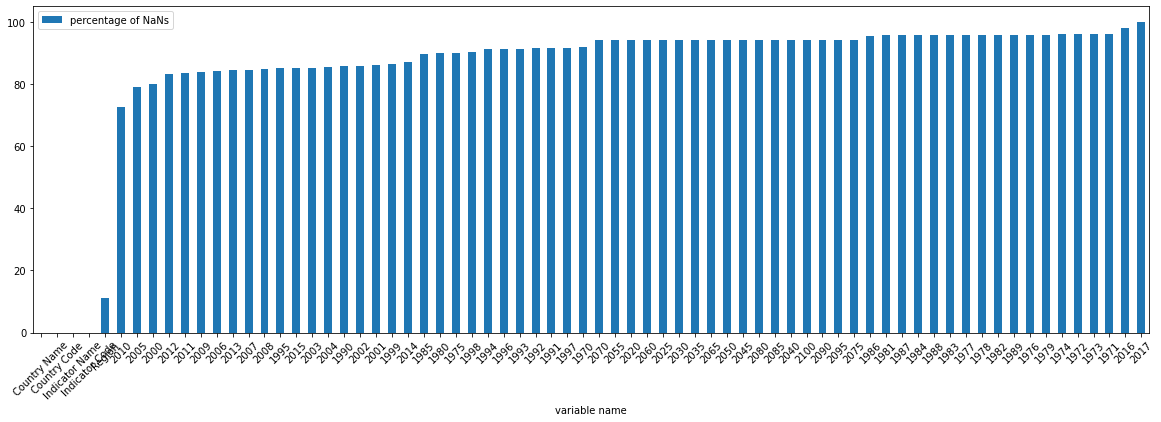

In [15]:
df_for_barplot=nans_df(ed_stats_data)

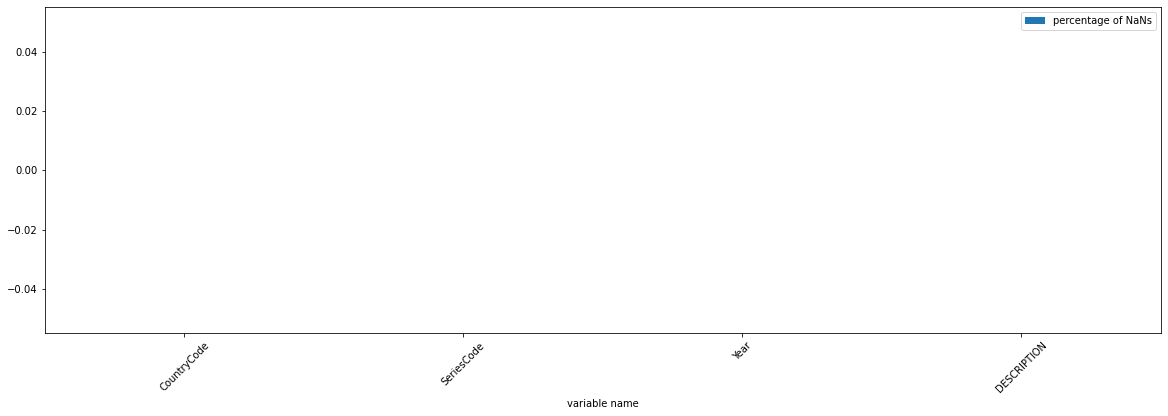

In [16]:
df_for_barplot=nans_df(ed_stats_footNote)

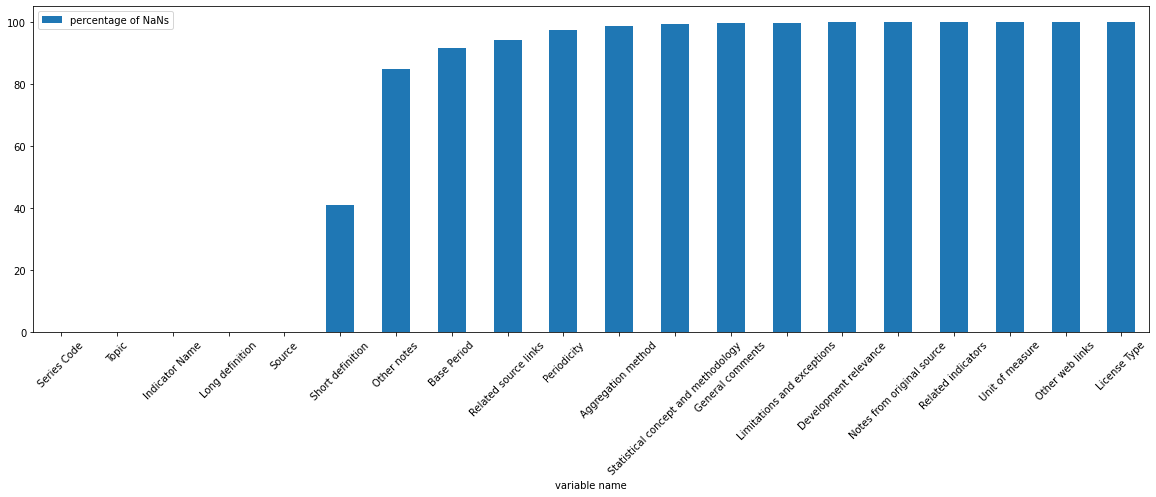

In [17]:
df_for_barplot=nans_df(ed_stats_series)

# 2- Dataframe indicators filtering

## 2.1- Filtering indicators by topic in 'ed-stats-series'

In [18]:
pd.options.display.max_colwidth=9000

In [19]:
# group indicators by topics in ed_stat_series dataframe
grouped_df= ed_stats_series.groupby('Topic')
grouped_lists = grouped_df['Indicator Name'].apply(list)
grouped_lists = grouped_lists.reset_index()
grouped_lists

Topic  \
0                                                                                     Attainment   
1                                                                                     Background   
2                                                                                           EMIS   
3                                                                Early Child Development (SABER)   
4                                                                      Early Childhood Education   
5                          Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
6   Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
7         Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
8                                                Economic Policy & Debt: Purchasing power parity   
9                                                                             Education Equality   
10                                              Education Management Information Systems (SABER)   
11                                                           Engaging the Private Sector (SABER)   
12                                                                                  Expenditures   
13                                                                             Health: Mortality   
14                                                                  Health: Population: Dynamics   
15                                                                 Health: Population: Structure   
16                                                                          Health: Risk factors   
17                                                                Infrastructure: Communications   
18                                                                                         Laber   
19                                                                             Learning Outcomes   
20                                                                                      Literacy   
21                                                                                    Population   
22                                                                   Post-Secondary/Non-Tertiary   
23                                                                                   Pre-Primary   
24                                                                                       Primary   
25                                                    School Autonomy and Accountability (SABER)   
26                                                                        School Finance (SABER)   
27                                                      School Health and School Feeding (SABER)   
28                                                                                     Secondary   
29                                              Social Protection & Labor: Labor force structure   
30                                                       Social Protection & Labor: Unemployment   
31                                                                    Student Assessment (SABER)   
32                                                                                      Teachers   
33                                                                              Teachers (SABER)   
34                                                                                      Tertiary   
35                                                                    Tertiary Education (SABER)   
36                                                                 Workforce Development (SABER)   

                                                                                                                                                                                                                                                                                                  

###### save indicators where Topics are in
{ 0:     Attainment ; 
  12:    Expenditures; 
  17:    Infrastructure: Communications;
  28:    Secondary;
  34:    Tertiary
  }
  
            3665 rows  --> 1242 rows​

In [20]:
selected_topics=['Attainment','Expenditures','Infrastructure: Communications','Secondary','Tertiary']
filtered_series=ed_stats_series[ed_stats_series["Topic"].isin(selected_topics)]
#filtered_series

## 2.2- Filtering indicators by keywords in 'ed-stats-series'

             1242 rows--> 606 --> 178 rows​


In [21]:
# group indicators by topics in ed_stat_series dataframe
grouped_df= filtered_series.groupby('Topic')
grouped_lists = grouped_df['Indicator Name'].apply(list)
grouped_lists = grouped_lists.reset_index()
#grouped_lists

In [22]:
# get indicators list from filtered ed_stats_series
selected_topics=['Infrastructure: Communications','Secondary','Tertiary']

# filter 'filtered_series' according to selected indicators
filtered_series=filtered_series[(filtered_series['Topic'].isin(selected_topics))\
                                |((filtered_series['Indicator Name'].str.contains('15-19|20-24',na=False)) & (filtered_series['Topic']=='Attainment'))\
                                |((filtered_series['Indicator Name'].str.contains('secondary|tertiary',na=False))& (filtered_series['Topic']=='Expenditures'))]

len(filtered_series)

606

In [23]:
#Filtering indicators where Topic = 'Attainment' by keyword (delete those containing 'female', 'male', or 'primary')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Attainment')\
                                          &(filtered_series['Indicator Name'].str.contains('female|male|primary',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Expenditure' by keyword (delete those containing non-tertiary)
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Expenditures')\
                                          &(filtered_series['Indicator Name'].str.contains('non-tertiary',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Secondary' by keyword (delete those containing 'male' or 'female')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Secondary')\
                                          &(filtered_series['Indicator Name'].str.contains('male|female|lower',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Tertiary' by keyword (delete those containing 'male' or 'female')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Tertiary')\
                                          &(filtered_series['Indicator Name'].str.contains('male|female',na=False,case=False))].index, inplace = True)
len(filtered_series)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


178

## 2.3- Filtering indicators in 'ed-stat-data'

           886930 rows-->38720 rows

In [24]:
selected_indicators=filtered_series['Indicator Name'].tolist()
len(selected_indicators)

178

In [25]:
filtered_ed_stats_data= ed_stats_data[ed_stats_data['Indicator Name'].isin (selected_indicators)]
filtered_ed_stats_data.shape

(38560, 70)

In [26]:
#variable_survey(filtered_ed_stats_data)

In [27]:
dataframes={'filtered_data': filtered_ed_stats_data}
dataframe_survey(dataframes)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,filtered_data,"(38560, 70)",2158091,79.95 %,0,0.0 %


# 3- Dataframe Nans filtering in ed_stats_data

       (38720 rows, 70 columns)  -->   (827  rows, 52 columns)

In [28]:
# define a function to visualise NaNs
def heatmap_nans(dataframe, th):
    print(((dataframe.isna().sum()/dataframe.shape[0])*100).sort_values())
    dataframe=dataframe[dataframe.columns[((dataframe.isna().sum()/dataframe.shape[0])*100)<th]]
    plt.figure(figsize=(20,10))
    sns.heatmap(dataframe.isna(),cbar=False)
    return dataframe

Country Name        0.00000
Country Code        0.00000
Indicator Name      0.00000
Indicator Code      0.00000
Region             11.20332
                    ...    
2030              100.00000
2020              100.00000
2017              100.00000
2055              100.00000
2025              100.00000
Length: 70, dtype: float64


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, gender parity index (GPI)",UIS.NERA.3.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Arab World,ARB,All staff compensation as % of total expenditure in lower secondary public institutions (%),UIS.XSPENDP.2.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Arab World,ARB,All staff compensation as % of total expenditure in secondary public institutions (%),UIS.XSPENDP.23.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Arab World,ARB,All staff compensation as % of total expenditure in tertiary public institutions (%),UIS.XSPENDP.56.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882586,Zimbabwe,ZWE,Theoretical duration of secondary education (years),SE.SEC.DURS,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.00000,6.00000,6.0,6.0,6.0,Sub-Saharan Africa
882587,Zimbabwe,ZWE,Theoretical duration of upper secondary education (years),SE.SEC.DURS.UP,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.00000,4.00000,4.0,4.0,4.0,Sub-Saharan Africa
882688,Zimbabwe,ZWE,"Total inbound internationally mobile students, both sexes (number)",UIS.MS.56.T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,889.0,884.0,648.0,352.00000,NaN,NaN,NaN,NaN,Sub-Saharan Africa
882698,Zimbabwe,ZWE,"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)",UIS.OE.56.40510,NaN,NaN,NaN,NaN,NaN,NaN,...,24581.0,20792.0,25236.0,28700.0,16012.00000,15885.00000,NaN,NaN,NaN,Sub-Saharan Africa


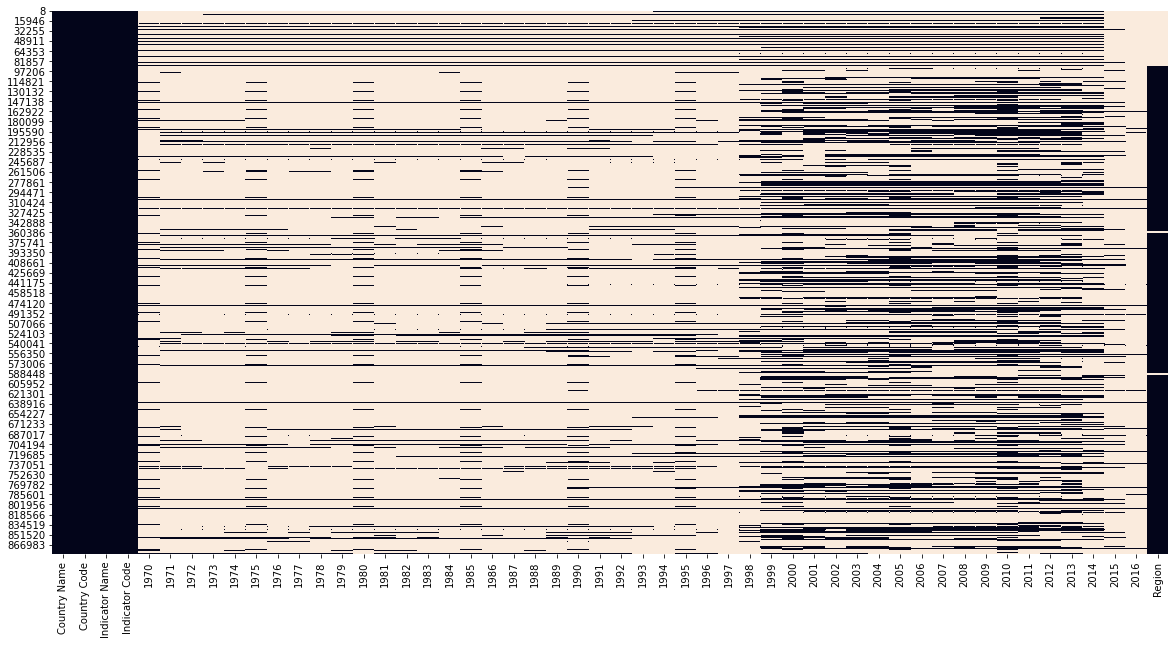

In [29]:
heatmap_nans(filtered_ed_stats_data,100)

In [30]:
filtered_data=filtered_ed_stats_data[filtered_ed_stats_data.columns[((filtered_ed_stats_data.isna().sum()/filtered_ed_stats_data.shape[0])*100)<100]]
filtered_data.shape

(38560, 52)

In [31]:
# count percentage of nans per row
#print(round(((filtered_data.isna().sum(axis=1))/((filtered_data.shape[1])-4)*100),2).sort_values())

In [32]:
# drop rows according to a fixed threshold of nans percentage
filtered_data= filtered_data.drop(filtered_data[((filtered_data.isna().sum(axis=1))/((filtered_data.shape[1])-4)*100)==100].index) 

In [33]:
list=((filtered_data.isna().sum(axis=1))/filtered_data.shape[1])*100
print(list)

1171      63.461538
1191       5.769231
1193      59.615385
1197       5.769231
1199       5.769231
            ...    
882586     0.000000
882587     0.000000
882688    82.692308
882698    59.615385
882943    76.923077
Length: 35535, dtype: float64


In [34]:
filtered_data.shape

(35535, 52)

    38720 rows  --> 26762 rows

In [35]:
nans_rows_percentage = list.tolist()
filtered_data.insert(3,'nans percentage',nans_rows_percentage)
filtered_data


,Country Name,Country Code,Indicator Name,nans percentage,Indicator Code,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region
1171,Arab World,ARB,"Enrolment in post-secondary non-tertiary education, both sexes (number)",63.461538,UIS.E.4,NaN,NaN,NaN,NaN,NaN,...,2.905856e+05,2.742247e+05,248527.25,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN,NaN
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (number)",5.769231,SE.SEC.ENRL,4842861.500,4.981844e+06,5270417.50,5593058.500,5938865.50,...,2.893511e+07,2.957251e+07,30134376.00,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07,NaN,NaN,NaN
1193,Arab World,ARB,"Enrolment in secondary education, private institutions, both sexes (number)",59.615385,UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,...,2.087889e+06,2.097570e+06,2182373.25,2.327964e+06,2.454828e+06,2.514028e+06,2.601100e+06,NaN,NaN,NaN
1197,Arab World,ARB,"Enrolment in secondary general, both sexes (number)",5.769231,SE.SEC.ENRL.GC,4356650.000,4.477696e+06,4737669.50,5039257.000,5305330.00,...,2.615166e+07,2.696901e+07,27483194.00,2.837384e+07,2.876566e+07,2.820554e+07,2.805445e+07,NaN,NaN,NaN
1199,Arab World,ARB,"Enrolment in secondary vocational, both sexes (number)",5.769231,SE.SEC.ENRL.VO,486211.625,5.041479e+05,532748.25,553801.375,633535.75,...,2.783442e+06,2.603492e+06,2651181.00,2.925946e+06,3.045490e+06,3.045056e+06,2.917798e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882586,Zimbabwe,ZWE,Theoretical duration of secondary education (years),0.000000,SE.SEC.DURS,6.000,6.000000e+00,6.00,6.000,6.00,...,6.000000e+00,6.000000e+00,6.00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.0,6.0,Sub-Saharan Africa
882587,Zimbabwe,ZWE,Theoretical duration of upper secondary education (years),0.000000,SE.SEC.DURS.UP,4.000,4.000000e+00,4.00,4.000,4.00,...,4.000000e+00,4.000000e+00,4.00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.0,4.0,Sub-Saharan Africa
882688,Zimbabwe,ZWE,"Total inbound internationally mobile students, both sexes (number)",82.692308,UIS.MS.56.T,NaN,NaN,NaN,NaN,NaN,...,NaN,8.890000e+02,884.00,6.480000e+02,3.520000e+02,NaN,NaN,NaN,NaN,Sub-Saharan Africa
882698,Zimbabwe,ZWE,"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)",59.615385,UIS.OE.56.40510,NaN,NaN,NaN,NaN,NaN,...,2.458100e+04,2.079200e+04,25236.00,2.870000e+04,1.601200e+04,1.588500e+04,NaN,NaN,NaN,Sub-Saharan Africa


In [36]:
pd.set_option("display.max_rows", None)

In [37]:
# display the mean of nans percentage for each indicator name --> discart those having a hight rate of nans
df=filtered_data.groupby('Indicator Name').agg({'nans percentage': ['mean']})
#df

In [38]:
final_selected_indicators=['Expenditure on secondary as % of government expenditure on education (%)',\
                           'Expenditure on tertiary as % of government expenditure on education (%)',\
                           'Gross enrolment ratio, secondary, both sexes (%)'\
                          'Gross enrolment ratio, tertiary, both sexes (%)','Internet users (per 100 people)',\
                           'Personal computers (per 100 people)']
#filtering ed_stats_data by final selected indicators
final_data= filtered_data[filtered_data['Indicator Name'].isin (final_selected_indicators)]
final_data.shape

(908, 53)

In [39]:
#final_data